# Лабораторная работа 1. Pandas, метод ближайших соседей и решающие деревья.

ФИО: Садекова Таснима Равилевна

Группа: 517

In [1]:
import numpy as np
import pandas as pd

## Часть 1: Pandas

#### Ответьте на вопросы о данных по авиарейсам в США.

Данные: http://stat-computing.org/dataexpo/2009/2008.csv.bz2
(обратите внимание, что распаковывать этот файл не обязательно — функция `pandas.read_csv` умеет читать из архивов автоматически)

Описание: http://stat-computing.org/dataexpo/2009/the-data.html

1. Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)
2. Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.
3. Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?
4. Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?
5. Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?
6. Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [2]:
file=pd.read_csv('2008.csv.bz2')

In [3]:
#1.Какая из причин отмены рейса (CancellationCode) была самой частой?
ll=file.CancellationCode.value_counts()
ll.idxmax()

'B'

'B' - из-за погоды

In [4]:
#2. Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.
print(file.Distance.mean())
print(file.Distance.min())
print(file.Distance.max())

726.3870294253928
11
4962


In [5]:
#3. В какие дни и на каких рейсах было минимальное расстояние
planemin=file[file.Distance==file.Distance.min()][['Year','Month','DayofMonth','FlightNum']]
print(planemin)
#Какое расстояние было пройдено этими же рейсами в другие дни
file[file.FlightNum.isin(planemin['FlightNum'].values)][['Year','Month','DayofMonth','FlightNum','Distance']]

         Year  Month  DayofMonth  FlightNum
2547298  2008      5          15       4988
4392215  2008      8          10       5572


,Year,Month,DayofMonth,FlightNum,Distance
151629,2008,1,2,5572,544
151771,2008,1,3,4988,834
152291,2008,1,3,5572,544
152430,2008,1,4,4988,834
152949,2008,1,4,5572,544
153088,2008,1,5,4988,834
153419,2008,1,5,5572,544
153545,2008,1,6,4988,834
153963,2008,1,6,5572,544
154096,2008,1,7,4988,834


In [6]:
#4. Из какого аэропорта было произведено больше всего вылетов и в каком он городе
airports=pd.read_csv('airports.csv')

In [7]:
l=file['Origin'].value_counts()
lid=l.idxmax()
(airports[airports['iata']==lid][['airport','city']])

,airport,city
880,William B Hartsfield-Atlanta Intl,Atlanta


In [8]:
#Найдите для каждого аэропорта среднее время полета (AirTime) по всем вылетевшим из него рейсам. 
airtime=file[['Origin','AirTime']].groupby(by="Origin").agg(np.mean)
airtime

,AirTime
Origin,
ABE,89.057518
ABI,36.789977
ABQ,91.657166
ABY,35.379759
ACK,50.692124
ACT,29.875977
ACV,58.850658
ACY,108.848214
ADK,151.423913


In [9]:
#Какой аэропорт имеет наибольшее значение этого показателя?
idmax=airtime['AirTime'].idxmax()
print(idmax)
airports[airports.iata==idmax]['airport']

SJU


2962    Luis Munoz Marin International
Name: airport, dtype: object

In [10]:
#Найдите аэропорт, у которого наибольшая доля задержанных (DepDelay > 0) рейсов. 
#Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов
#количество всех рейсов у аэропорта
allr=pd.DataFrame(file.groupby(by="Origin",as_index=False)["Origin"].agg({'all':'count'}))
#количество задержанных рейсов
delayed=pd.DataFrame(file[file['DepDelay']>0].groupby(by="Origin",as_index=False)["Origin"].agg({'delayed':'count'}))
table=(pd.merge(allr,delayed,how="right"))
table=table[table['all']>=1000]
table.ix[(table['delayed']/table['all']).idxmax()]['Origin']

'DAL'

## Часть 2: метрические методы и категориальные признаки

Все дальнейшие эксперименты предлагается проводить на данных соревнования Amazon Employee Access Challenge: https://www.kaggle.com/c/amazon-employee-access-challenge

В данной задаче предлагается предсказать, будет ли одобрен запрос сотрудника на получение доступа к тому или иному ресурсу. Все признаки являются категориальными.

Для удобства данные можно загрузить по ссылке: https://www.dropbox.com/s/q6fbs1vvhd5kvek/amazon.csv

Сразу прочитаем данные и создадим разбиение на обучение и контроль:

In [11]:
data = pd.read_csv('amazon.csv')
data.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [12]:
data.shape

(32769, 10)

In [13]:
# доля положительных примеров
data.ACTION.mean()

0.9421099209618847

In [14]:
# число значений у признаков
for col_name in data.columns:
    print (col_name, len(data[col_name].unique()))

ACTION 2
RESOURCE 7518
MGR_ID 4243
ROLE_ROLLUP_1 128
ROLE_ROLLUP_2 177
ROLE_DEPTNAME 449
ROLE_TITLE 343
ROLE_FAMILY_DESC 2358
ROLE_FAMILY 67
ROLE_CODE 343


In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0],
                                                    test_size=0.3, random_state=241)

#### 1. Реализуйте три функции расстояния на категориальных признаках, которые обсуждались на втором семинаре.

Проще всего будет определить метрики как [user-defined distance](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html), после чего воспользоваться реализацией kNN из sklearn (в этом случае используйте функцию predict_proba). Можно реализовать метод k ближайших соседей и самостоятально — в этом случае учитите, что он должен возвращать оценку вероятности, то есть отношение объектов первого класса среди соседей к числу соседей).

Постарайтесь уделить особое внимание эффективности кода — при реализации метрик "в лоб" вы можете столкнуться с очень большим временем выполнения.

#### Подсчитайте для каждой из метрик качество на тестовой выборке `X_test` при числе соседей $k = 10$. Мера качества — AUC-ROC.

#### Какая функция расстояния оказалась лучшей?

In [16]:
print(y_train[:3])
X_train[:3]

1728     1
22856    1
27691    1
Name: ACTION, dtype: int64


,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
1728,40867,8150,117961,118386,119954,118054,118054,117887,118055
22856,38587,14551,5110,117954,117895,117899,117897,19721,117900
27691,3853,51301,118290,118291,121108,126869,118302,118295,126870


In [17]:
X_train[1:2]

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
22856,38587,14551,5110,117954,117895,117899,117897,19721,117900


In [18]:
def dist_ind(x,z):
    ri=np.array(list(map(lambda x,y:0 if x==y else 1,x,z)))
    return ri.sum()/x.shape[0]

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [415]:
!!!!!!!!!!!!!!def classifyKNN (trainData,trainY,testData,k,dist, numberOfClasses=2):
    #Euclidean distance between 2-dimensional point
    trainData=np.array(trainData)
    testData=np.array(testData)
    trainY=np.array(trainY)
    testLabels=[]
    for testPoint in testData:
        #Claculate distances between test point and all of the train points
        testDist = [ [dist(testPoint, trainData[i]), trainY[i],1/] for i in range(len(trainData))]
        #testDist = [ [dist(testPoint, trainData), trainY]]
        #How many points of each class among nearest K
        
        #stat = [0,1]
        #for d in sorted(testDist)[0:k]:
            #stat[d[1]] += 1
        #Assign a class with the most number of occurences among K nearest neighbours
        testLabels.append(1 if sum())
    return testLabels

In [20]:
nbrs=KNeighborsClassifier(n_neighbors=10,metric=dist_ind)
nbrs.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30,
           metric=<function dist_ind at 0x0000000009C1C048>,
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [21]:
pred=nbrs.predict_proba(X_test)[:,1]

In [22]:
roc_auc_score(y_test, pred)

0.82627257082597416

#### 2 (бонус). Подберите лучшее (на тестовой выборке) число соседей $k$ для каждой из функций расстояния. Какое наилучшее качество удалось получить?

Для подбора можно использовать любые средства из sklearn.

In [23]:
from sklearn import cross_validation

#### 3. Реализуйте счетчики (http://blogs.technet.com/b/machinelearning/archive/2015/02/17/big-learning-made-easy-with-counts.aspx), которые заменят категориальные признаки на вещественные.

А именно, каждый категориальный признак нужно заменить на три: 
1. Число `counts` объектов в обучающей выборке с таким же значением признака.
2. Число `successes` объектов первого класса ($y = 1$) в обучающей выборке с таким же значением признака.
3. Сглаженное отношение двух предыдущих величин: (`successes` + 1) / (`counts` + 2).

Поскольку признаки, содержащие информацию о целевой переменной, могут привести к переобучению, может оказаться полезным сделать *фолдинг*: разбить обучающую выборку на $n$ частей, и для $i$-й части считать `counts` и `successes` по всем остальным частям. Для тестовой выборки используются счетчики, посчитанные по всей обучающей выборке. Реализуйте и такой вариант. Можно использовать $n = 3$.

#### Посчитайте на тесте AUC-ROC метода $k$ ближайших соседей с евклидовой метрикой для выборки, где категориальные признаки заменены на счетчики. Сравните по AUC-ROC два варианта формирования выборки — с фолдингом и без. Не забудьте подобрать наилучшее число соседей $k$.

In [24]:
#фолдинг для train
nrow,ncol=X_train.shape
n=3
newtrain=pd.DataFrame()
for i in X_train.columns:
    newtrain.insert(loc=newtrain.shape[1],column='counts ' +str(i),value=np.zeros(nrow))
    newtrain.insert(loc=newtrain.shape[1],column='successes ' +str(i),value=np.zeros(nrow))
    newtrain.insert(loc=newtrain.shape[1],column='val ' +str(i),value=np.zeros(nrow))

num=nrow//n
for train_indices, test_indices in cross_validation.KFold(nrow, n_folds = n, shuffle = True, random_state = 1):
    df1=X_train.iloc[test_indices]
    df2=X_train.iloc[train_indices]
    y=y_train.iloc[train_indices]
    for i in X_train.columns[:ncol]:
        g=df2.groupby(i,as_index=False)[i].agg({'count1':'count'})
        col=pd.merge(df1,g,how='left',on=i).fillna(value=0)
        newtrain['counts ' +str(i)].iloc[test_indices]=col['count1'].values
            
        yright=y[y==1]
        
        s=df2[df2.index.isin(yright.index)]
            #print(s)
        s=s.groupby(i,as_index=False)[i].agg({'count2':'count'})
            #print(s)
        col2=pd.merge(df1,s,how='left',on=i).fillna(value=0)
        newtrain['successes ' +str(i)].iloc[test_indices]=col2['count2'].values
            
        col3=pd.Series((np.array(col2['count2'])+np.ones(num))/(np.array(col['count1'])+2*np.ones(num)))
        newtrain['val ' +str(i)].iloc[test_indices]=col3.values
newtrain=newtrain.set_index(X_train.index)
newtrain[:3] 

,counts RESOURCE,successes RESOURCE,val RESOURCE,counts MGR_ID,successes MGR_ID,val MGR_ID,counts ROLE_ROLLUP_1,successes ROLE_ROLLUP_1,val ROLE_ROLLUP_1,counts ROLE_ROLLUP_2,...,val ROLE_TITLE,counts ROLE_FAMILY_DESC,successes ROLE_FAMILY_DESC,val ROLE_FAMILY_DESC,counts ROLE_FAMILY,successes ROLE_FAMILY,val ROLE_FAMILY,counts ROLE_CODE,successes ROLE_CODE,val ROLE_CODE
1728,24.0,24.0,0.961538,5.0,5.0,0.857143,9984.0,9504.0,0.951833,825.0,...,0.970509,148.0,144.0,0.966667,1130.0,1083.0,0.957597,371.0,361.0,0.970509
22856,2.0,1.0,0.500000,1.0,1.0,0.666667,83.0,82.0,0.976471,83.0,...,0.901786,191.0,167.0,0.870466,1265.0,1133.0,0.895028,110.0,100.0,0.901786
27691,190.0,186.0,0.973958,5.0,5.0,0.857143,192.0,170.0,0.881443,191.0,...,0.923077,29.0,28.0,0.935484,254.0,244.0,0.957031,11.0,11.0,0.923077


In [35]:
#train без фолдинга
n=1
newtrain2=pd.DataFrame()
yright=y_train[y_train==1]
s=X_train[X_train.index.isin(yright.index)]
nrow,ncol=X_train.shape
for i in X_train.columns[:ncol]:
    name1='counts '+str(i)
    name2='successes '+str(i)
    name3='val '+str(i)
    newtrain2[name1] = X_train.groupby(i)[i].transform('count')
   
    si=s.groupby(i,as_index=False)[i].agg({name2 :'count'})
    col2=pd.merge(X_train,si,how='left',on=i).fillna(value=0)
    newtrain2.insert(loc=newtrain2.shape[1],column=name2,value=col2[name2].values)
    
    col3=pd.Series((np.array(newtrain2[name2])+np.ones(nrow))/(np.array(newtrain2[name1])+2*np.ones(nrow)))
    newtrain2.insert(loc=newtrain2.shape[1],column=name3,value=col3.values)
    newtrain2[name1]=newtrain2[name1].astype(int)
    newtrain2[name2]=newtrain2[name2].astype(int)
newtrain2=newtrain2.set_index(X_train.index)
newtrain2[:3]

,counts RESOURCE,successes RESOURCE,val RESOURCE,counts MGR_ID,successes MGR_ID,val MGR_ID,counts ROLE_ROLLUP_1,successes ROLE_ROLLUP_1,val ROLE_ROLLUP_1,counts ROLE_ROLLUP_2,...,val ROLE_TITLE,counts ROLE_FAMILY_DESC,successes ROLE_FAMILY_DESC,val ROLE_FAMILY_DESC,counts ROLE_FAMILY,successes ROLE_FAMILY,val ROLE_FAMILY,counts ROLE_CODE,successes ROLE_CODE,val ROLE_CODE
1728,43,43,0.977778,8,8,0.9,14946,14224,0.951632,1226,...,0.974729,217,213,0.977169,1684,1618,0.960261,552,539,0.974729
22856,3,2,0.600000,3,3,0.8,126,123,0.968750,126,...,0.918129,268,236,0.877778,1846,1662,0.899892,169,156,0.918129
27691,292,287,0.979592,8,8,0.9,281,253,0.897527,280,...,0.937500,42,38,0.886364,337,319,0.943953,14,14,0.937500


In [25]:
#test по всему train
n=1
nrow1,ncol1=X_test.shape
yright=y_train[y_train==1]
s=X_train[X_train.index.isin(yright.index)]
newtest=pd.DataFrame()
for i in X_test:
    newtest.insert(loc=newtest.shape[1],column='counts ' +str(i),value=np.zeros(nrow1))
    newtest.insert(loc=newtest.shape[1],column='successes ' +str(i),value=np.zeros(nrow1))
    newtest.insert(loc=newtest.shape[1],column='val ' +str(i),value=np.zeros(nrow1))

for i in X_test.columns[:ncol1]:
    print(i)
    col1=[]
    col2=[]
    name1='counts '+str(i)
    name2='successes '+str(i)
    name3='val '+str(i)
    for j in X_test[i]:
        p=X_train[X_train[i]==j][i]               
        col1.append(p.shape[0])
        col2.append((p.index.isin(yright.index)).sum())
    newtest[name1]=col1
    newtest[name2]=col2
    newtest[name3]=pd.Series((np.array(newtest[name2])+np.ones(nrow1))/(np.array(newtest[name1])+2*np.ones(nrow1)))
newtest=newtest.set_index(X_test.index)
newtest[:3]

RESOURCE
MGR_ID
ROLE_ROLLUP_1
ROLE_ROLLUP_2
ROLE_DEPTNAME
ROLE_TITLE
ROLE_FAMILY_DESC
ROLE_FAMILY
ROLE_CODE


,counts RESOURCE,successes RESOURCE,val RESOURCE,counts MGR_ID,successes MGR_ID,val MGR_ID,counts ROLE_ROLLUP_1,successes ROLE_ROLLUP_1,val ROLE_ROLLUP_1,counts ROLE_ROLLUP_2,...,val ROLE_TITLE,counts ROLE_FAMILY_DESC,successes ROLE_FAMILY_DESC,val ROLE_FAMILY_DESC,counts ROLE_FAMILY,successes ROLE_FAMILY,val ROLE_FAMILY,counts ROLE_CODE,successes ROLE_CODE,val ROLE_CODE
24312,4,4,0.833333,33,33,0.971429,14946,14224,0.951632,1748,...,0.940795,92,90,0.968085,7665,7248,0.945481,1231,1159,0.940795
12246,5,5,0.857143,27,27,0.965517,14946,14224,0.951632,652,...,0.972789,27,27,0.965517,7665,7248,0.945481,145,142,0.972789
15099,12,11,0.857143,16,16,0.944444,14946,14224,0.951632,3125,...,0.882591,63,63,0.984615,917,869,0.946681,245,217,0.882591


Посчитайте на тесте AUC-ROC метода  k  ближайших соседей с евклидовой метрикой для выборки, 
где категориальные признаки заменены на счетчики. 
Сравните по AUC-ROC два варианта формирования выборки — с фолдингом и без. 
Не забудьте подобрать наилучшее число соседей  kk .

In [55]:
x=[]
y=[]
for k in range(3,80,2):
    x.append(k)
    nbrs_c=KNeighborsClassifier(n_neighbors=k,metric='minkowski', p=2)
    nbrs_c.fit(newtrain,y_train)
    pred=nbrs_c.predict_proba(newtest)[:,1]
    y.append(roc_auc_score(y_test, pred))

In [57]:
x3=[]
y3=[]
for k in range(79,100,2):
    x3.append(k)
    nbrs_c=KNeighborsClassifier(n_neighbors=k,metric='minkowski', p=2)
    nbrs_c.fit(newtrain,y_train)
    pred=nbrs_c.predict_proba(newtest)[:,1]
    y3.append(roc_auc_score(y_test, pred))

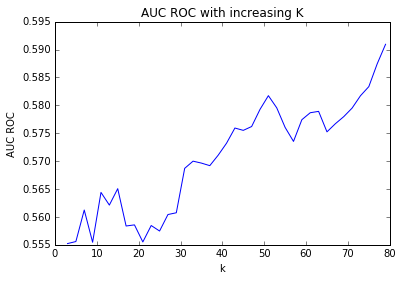

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("AUC ROC with increasing K")
plt.xlabel('k')
plt.ylabel('AUC ROC')
plt.plot(x, y)
plt.show()

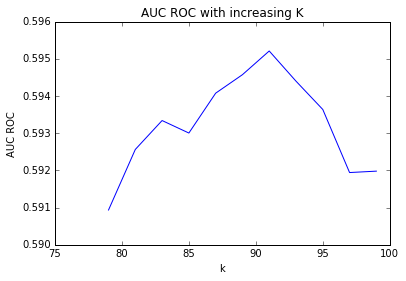

In [58]:
%matplotlib inline
plt.title("AUC ROC with increasing K")
plt.xlabel('k')
plt.ylabel('AUC ROC')
plt.plot(x3, y3)
plt.show()

In [66]:
print(y3[6],y3[7])

0.595209996111 0.594398600122


Лучшее число соседей при обучающей выборке с фолдингом k=91,auc=0.595209996111

In [38]:
x2=[]
y2=[]
for k in range(3,50,2):
    x2.append(k)
    nbrs_c=KNeighborsClassifier(n_neighbors=k,metric='minkowski', p=2)
    nbrs_c.fit(newtrain2,y_train)
    pred=nbrs_c.predict_proba(newtest)[:,1]
    y2.append(roc_auc_score(y_test, pred))

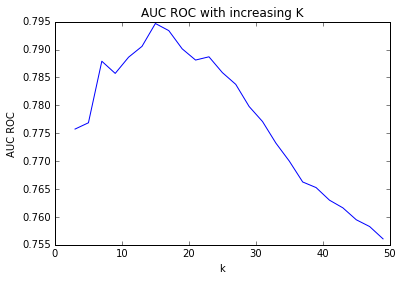

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("AUC ROC with increasing K")
plt.xlabel('k')
plt.ylabel('AUC ROC')
plt.plot(x2, y2)
plt.show()

Лучшее число соседей при обучающей выборке с фолдингом k=15, auc=0.795

Качество при обучающих данных с фолдингом получилось плохим, так как при разбиении мы ищем счетчики только по 66% данным

#### 4. Добавьте в исходную выборку парные признаки — то есть для каждой пары $(f_i, f_j)$, $i < j$ исходных категориальных признаков добавьте новый категориальный признак $f_{ij}$, значение которого является конкатенацией значений $f_i$ и $f_j$ (желательно через какой-нибудь специальный символ во избежание коллизий). Посчитайте счетчики для этой выборки, найдите качество метода $k$ ближайших соседей с наилучшим $k$ (с фолдингом и без).

In [40]:
ii=0
for i in X_train.columns[1:]:
    ii+=1
    for j in X_train.columns[:ii]:
        X_train.insert(loc=X_train.shape[1],column='('+str(j)+';'+str(i)+')',value=list(zip(X_train[j],X_train[i])))
print(X_train.shape)
X_train[:3]

(22938, 45)


,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,(RESOURCE;MGR_ID),...,(ROLE_TITLE;ROLE_FAMILY),(ROLE_FAMILY_DESC;ROLE_FAMILY),(RESOURCE;ROLE_CODE),(MGR_ID;ROLE_CODE),(ROLE_ROLLUP_1;ROLE_CODE),(ROLE_ROLLUP_2;ROLE_CODE),(ROLE_DEPTNAME;ROLE_CODE),(ROLE_TITLE;ROLE_CODE),(ROLE_FAMILY_DESC;ROLE_CODE),(ROLE_FAMILY;ROLE_CODE)
1728,40867,8150,117961,118386,119954,118054,118054,117887,118055,"(40867, 8150)",...,"(118054, 117887)","(118054, 117887)","(40867, 118055)","(8150, 118055)","(117961, 118055)","(118386, 118055)","(119954, 118055)","(118054, 118055)","(118054, 118055)","(117887, 118055)"
22856,38587,14551,5110,117954,117895,117899,117897,19721,117900,"(38587, 14551)",...,"(117899, 19721)","(117897, 19721)","(38587, 117900)","(14551, 117900)","(5110, 117900)","(117954, 117900)","(117895, 117900)","(117899, 117900)","(117897, 117900)","(19721, 117900)"
27691,3853,51301,118290,118291,121108,126869,118302,118295,126870,"(3853, 51301)",...,"(126869, 118295)","(118302, 118295)","(3853, 126870)","(51301, 126870)","(118290, 126870)","(118291, 126870)","(121108, 126870)","(126869, 126870)","(118302, 126870)","(118295, 126870)"


In [41]:
ii=0
for i in X_test.columns[1:]:
    ii+=1
    for j in X_test.columns[:ii]:
        X_test.insert(loc=X_test.shape[1],column='('+str(j)+';'+str(i)+')',value=list(zip(X_test[j],X_test[i])))
print(X_test.shape)
X_test[:3]

(9831, 45)


,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,(RESOURCE;MGR_ID),...,(ROLE_TITLE;ROLE_FAMILY),(ROLE_FAMILY_DESC;ROLE_FAMILY),(RESOURCE;ROLE_CODE),(MGR_ID;ROLE_CODE),(ROLE_ROLLUP_1;ROLE_CODE),(ROLE_ROLLUP_2;ROLE_CODE),(ROLE_DEPTNAME;ROLE_CODE),(ROLE_TITLE;ROLE_CODE),(ROLE_FAMILY_DESC;ROLE_CODE),(ROLE_FAMILY;ROLE_CODE)
24312,80769,7525,117961,118225,120551,118784,147114,290919,118786,"(80769, 7525)",...,"(118784, 290919)","(147114, 290919)","(80769, 118786)","(7525, 118786)","(117961, 118786)","(118225, 118786)","(120551, 118786)","(118784, 118786)","(147114, 118786)","(290919, 118786)"
12246,53101,7014,117961,118446,119961,118278,287351,290919,118279,"(53101, 7014)",...,"(118278, 290919)","(287351, 290919)","(53101, 118279)","(7014, 118279)","(117961, 118279)","(118446, 118279)","(119961, 118279)","(118278, 118279)","(287351, 118279)","(290919, 118279)"
15099,19989,15542,117961,118300,118395,118396,300044,118398,118399,"(19989, 15542)",...,"(118396, 118398)","(300044, 118398)","(19989, 118399)","(15542, 118399)","(117961, 118399)","(118300, 118399)","(118395, 118399)","(118396, 118399)","(300044, 118399)","(118398, 118399)"


In [42]:
#фолдинг для train с парами
nrow,ncol=X_train.shape
n=3
newtrain=pd.DataFrame()
for i in X_train.columns:
    newtrain.insert(loc=newtrain.shape[1],column='counts ' +str(i),value=np.zeros(nrow))
    newtrain.insert(loc=newtrain.shape[1],column='successes ' +str(i),value=np.zeros(nrow))
    newtrain.insert(loc=newtrain.shape[1],column='val ' +str(i),value=np.zeros(nrow))

num=nrow//n
for train_indices, test_indices in cross_validation.KFold(nrow, n_folds = n, shuffle = True, random_state = 1):
    df1=X_train.iloc[test_indices]
    df2=X_train.iloc[train_indices]
    y=y_train.iloc[train_indices]
    for i in X_train.columns[:ncol]:
        g=df2.groupby(i,as_index=False)[i].agg({'count1':'count'})
        col=pd.merge(df1,g,how='left',on=i).fillna(value=0)
        newtrain['counts ' +str(i)].iloc[test_indices]=col['count1'].values
            
        yright=y[y==1]
        
        s=df2[df2.index.isin(yright.index)]
            #print(s)
        s=s.groupby(i,as_index=False)[i].agg({'count2':'count'})
            #print(s)
        col2=pd.merge(df1,s,how='left',on=i).fillna(value=0)
        newtrain['successes ' +str(i)].iloc[test_indices]=col2['count2'].values
            
        col3=pd.Series((np.array(col2['count2'])+np.ones(num))/(np.array(col['count1'])+2*np.ones(num)))
        newtrain['val ' +str(i)].iloc[test_indices]=col3.values
newtrain=newtrain.set_index(X_train.index)
newtrain[:3] 

,counts RESOURCE,successes RESOURCE,val RESOURCE,counts MGR_ID,successes MGR_ID,val MGR_ID,counts ROLE_ROLLUP_1,successes ROLE_ROLLUP_1,val ROLE_ROLLUP_1,counts ROLE_ROLLUP_2,...,val (ROLE_DEPTNAME;ROLE_CODE),counts (ROLE_TITLE;ROLE_CODE),successes (ROLE_TITLE;ROLE_CODE),val (ROLE_TITLE;ROLE_CODE),counts (ROLE_FAMILY_DESC;ROLE_CODE),successes (ROLE_FAMILY_DESC;ROLE_CODE),val (ROLE_FAMILY_DESC;ROLE_CODE),counts (ROLE_FAMILY;ROLE_CODE),successes (ROLE_FAMILY;ROLE_CODE),val (ROLE_FAMILY;ROLE_CODE)
1728,24.0,24.0,0.961538,5.0,5.0,0.857143,9984.0,9504.0,0.951833,825.0,...,0.80,371.0,361.0,0.970509,140.0,136.0,0.964789,371.0,361.0,0.970509
22856,2.0,1.0,0.500000,1.0,1.0,0.666667,83.0,82.0,0.976471,83.0,...,0.95,110.0,100.0,0.901786,42.0,35.0,0.818182,110.0,100.0,0.901786
27691,190.0,186.0,0.973958,5.0,5.0,0.857143,192.0,170.0,0.881443,191.0,...,0.80,11.0,11.0,0.923077,3.0,3.0,0.800000,11.0,11.0,0.923077


In [43]:
#train с парами без фолдинга
n=1
newtrain2=pd.DataFrame()
yright=y_train[y_train==1]
s=X_train[X_train.index.isin(yright.index)]
nrow,ncol=X_train.shape
for i in X_train.columns[:ncol]:
    name1='counts '+str(i)
    name2='successes '+str(i)
    name3='val '+str(i)
    newtrain2[name1] = X_train.groupby(i)[i].transform('count')
   
    si=s.groupby(i,as_index=False)[i].agg({name2 :'count'})
    col2=pd.merge(X_train,si,how='left',on=i).fillna(value=0)
    newtrain2.insert(loc=newtrain2.shape[1],column=name2,value=col2[name2].values)
    
    col3=pd.Series((np.array(newtrain2[name2])+np.ones(nrow))/(np.array(newtrain2[name1])+2*np.ones(nrow)))
    newtrain2.insert(loc=newtrain2.shape[1],column=name3,value=col3.values)
    newtrain2[name1]=newtrain2[name1].astype(int)
    newtrain2[name2]=newtrain2[name2].astype(int)
newtrain2=newtrain2.set_index(X_train.index)
newtrain2[:3]

,counts RESOURCE,successes RESOURCE,val RESOURCE,counts MGR_ID,successes MGR_ID,val MGR_ID,counts ROLE_ROLLUP_1,successes ROLE_ROLLUP_1,val ROLE_ROLLUP_1,counts ROLE_ROLLUP_2,...,val (ROLE_DEPTNAME;ROLE_CODE),counts (ROLE_TITLE;ROLE_CODE),successes (ROLE_TITLE;ROLE_CODE),val (ROLE_TITLE;ROLE_CODE),counts (ROLE_FAMILY_DESC;ROLE_CODE),successes (ROLE_FAMILY_DESC;ROLE_CODE),val (ROLE_FAMILY_DESC;ROLE_CODE),counts (ROLE_FAMILY;ROLE_CODE),successes (ROLE_FAMILY;ROLE_CODE),val (ROLE_FAMILY;ROLE_CODE)
1728,43,43,0.977778,8,8,0.9,14946,14224,0.951632,1226,...,0.923077,552,539,0.974729,206,202,0.975962,552,539,0.974729
22856,3,2,0.600000,3,3,0.8,126,123,0.968750,126,...,0.965517,169,156,0.918129,65,55,0.835821,169,156,0.918129
27691,292,287,0.979592,8,8,0.9,281,253,0.897527,280,...,0.875000,14,14,0.937500,6,6,0.875000,14,14,0.937500


In [44]:
#test по всему train
n=1
nrow1,ncol1=X_test.shape
yright=y_train[y_train==1]
s=X_train[X_train.index.isin(yright.index)]
newtest=pd.DataFrame()
for i in X_test:
    newtest.insert(loc=newtest.shape[1],column='counts ' +str(i),value=np.zeros(nrow1))
    newtest.insert(loc=newtest.shape[1],column='successes ' +str(i),value=np.zeros(nrow1))
    newtest.insert(loc=newtest.shape[1],column='val ' +str(i),value=np.zeros(nrow1))

for i in X_test.columns[:ncol1]:
    print(i)
    col1=[]
    col2=[]
    name1='counts '+str(i)
    name2='successes '+str(i)
    name3='val '+str(i)
    for j in X_test[i]:
        p=X_train[X_train[i]==j][i]               
        col1.append(p.shape[0])
        col2.append((p.index.isin(yright.index)).sum())
    newtest[name1]=col1
    newtest[name2]=col2
    newtest[name3]=pd.Series((np.array(newtest[name2])+np.ones(nrow1))/(np.array(newtest[name1])+2*np.ones(nrow1)))
newtest=newtest.set_index(X_test.index)
newtest[:3]

RESOURCE
MGR_ID
ROLE_ROLLUP_1
ROLE_ROLLUP_2
ROLE_DEPTNAME
ROLE_TITLE
ROLE_FAMILY_DESC
ROLE_FAMILY
ROLE_CODE
(RESOURCE;MGR_ID)
(RESOURCE;ROLE_ROLLUP_1)
(MGR_ID;ROLE_ROLLUP_1)
(RESOURCE;ROLE_ROLLUP_2)
(MGR_ID;ROLE_ROLLUP_2)
(ROLE_ROLLUP_1;ROLE_ROLLUP_2)
(RESOURCE;ROLE_DEPTNAME)
(MGR_ID;ROLE_DEPTNAME)
(ROLE_ROLLUP_1;ROLE_DEPTNAME)
(ROLE_ROLLUP_2;ROLE_DEPTNAME)
(RESOURCE;ROLE_TITLE)
(MGR_ID;ROLE_TITLE)
(ROLE_ROLLUP_1;ROLE_TITLE)
(ROLE_ROLLUP_2;ROLE_TITLE)
(ROLE_DEPTNAME;ROLE_TITLE)
(RESOURCE;ROLE_FAMILY_DESC)
(MGR_ID;ROLE_FAMILY_DESC)
(ROLE_ROLLUP_1;ROLE_FAMILY_DESC)
(ROLE_ROLLUP_2;ROLE_FAMILY_DESC)
(ROLE_DEPTNAME;ROLE_FAMILY_DESC)
(ROLE_TITLE;ROLE_FAMILY_DESC)
(RESOURCE;ROLE_FAMILY)
(MGR_ID;ROLE_FAMILY)
(ROLE_ROLLUP_1;ROLE_FAMILY)
(ROLE_ROLLUP_2;ROLE_FAMILY)
(ROLE_DEPTNAME;ROLE_FAMILY)
(ROLE_TITLE;ROLE_FAMILY)
(ROLE_FAMILY_DESC;ROLE_FAMILY)
(RESOURCE;ROLE_CODE)
(MGR_ID;ROLE_CODE)
(ROLE_ROLLUP_1;ROLE_CODE)
(ROLE_ROLLUP_2;ROLE_CODE)
(ROLE_DEPTNAME;ROLE_CODE)
(ROLE_TITLE;ROLE_CODE)
(ROLE_FAM

,counts RESOURCE,successes RESOURCE,val RESOURCE,counts MGR_ID,successes MGR_ID,val MGR_ID,counts ROLE_ROLLUP_1,successes ROLE_ROLLUP_1,val ROLE_ROLLUP_1,counts ROLE_ROLLUP_2,...,val (ROLE_DEPTNAME;ROLE_CODE),counts (ROLE_TITLE;ROLE_CODE),successes (ROLE_TITLE;ROLE_CODE),val (ROLE_TITLE;ROLE_CODE),counts (ROLE_FAMILY_DESC;ROLE_CODE),successes (ROLE_FAMILY_DESC;ROLE_CODE),val (ROLE_FAMILY_DESC;ROLE_CODE),counts (ROLE_FAMILY;ROLE_CODE),successes (ROLE_FAMILY;ROLE_CODE),val (ROLE_FAMILY;ROLE_CODE)
24312,4,4,0.833333,33,33,0.971429,14946,14224,0.951632,1748,...,0.944444,1231,1159,0.940795,92,90,0.968085,1231,1159,0.940795
12246,5,5,0.857143,27,27,0.965517,14946,14224,0.951632,652,...,0.962963,145,142,0.972789,11,11,0.923077,145,142,0.972789
15099,12,11,0.857143,16,16,0.944444,14946,14224,0.951632,3125,...,0.848485,245,217,0.882591,44,44,0.978261,245,217,0.882591


In [69]:
x=[]
y=[]
for k in range(1,100,2):
    x.append(k)
    nbrs_c=KNeighborsClassifier(n_neighbors=k,metric='minkowski', p=2)
    nbrs_c.fit(newtrain,y_train)
    pred=nbrs_c.predict_proba(newtest)[:,1]
    y.append(roc_auc_score(y_test, pred))

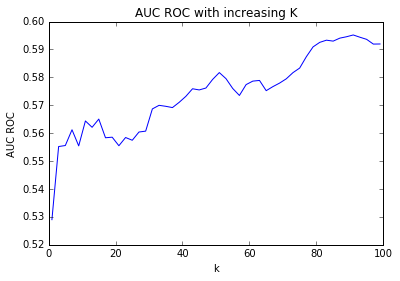

In [70]:
%matplotlib inline
plt.title("AUC ROC with increasing K")
plt.xlabel('k')
plt.ylabel('AUC ROC')
plt.plot(x, y)
plt.show()

In [71]:
y[-10:]

[0.59256303010306088,
 0.59334028096765135,
 0.59300449062303007,
 0.59407574898229554,
 0.59457300982445094,
 0.59520999611104997,
 0.59439860012177226,
 0.59363788268597761,
 0.59194221782289236,
 0.59198004702682228]

In [ ]:
Наилучшее качество при обучающей выборке с фолдингом достигается при k=89   и равно 0.59457300982445094

In [47]:
x2=[]
y2=[]
for k in range(1,50,2):
    x2.append(k)
    nbrs_c=KNeighborsClassifier(n_neighbors=k,metric='minkowski', p=2)
    nbrs_c.fit(newtrain2,y_train)
    pred=nbrs_c.predict_proba(newtest)[:,1]
    y2.append(roc_auc_score(y_test, pred))

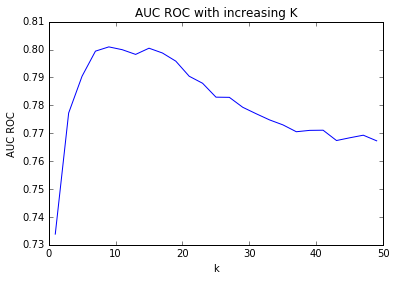

In [48]:
%matplotlib inline
plt.title("AUC ROC with increasing K")
plt.xlabel('k')
plt.ylabel('AUC ROC')
plt.plot(x2, y2)
plt.show()

In [52]:
print(y2[4])

0.800936528886


Наилучшее качество при обучающей выборке без фолдинга достигается при k=9 и равно 0.80093652888569722

Добавление парных признаков немного улучшило качество на обучающих данных без фолдинга.

## Часть 3: Решающие деревья и леса

#### 1. Возьмите из предыдущей части выборку с парными признаками, преобразованную с помощью счетчиков без фолдинга. Настройте решающее дерево, подобрав оптимальные значения параметров `max_depth` и `min_samples_leaf`. Какой наилучший AUC-ROC на контроле удалось получить?

In [72]:
from sklearn.tree import DecisionTreeClassifier

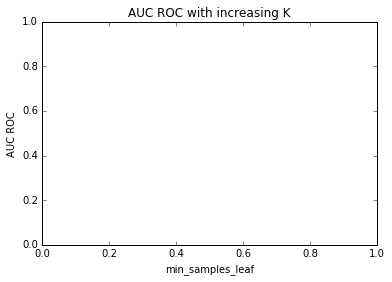

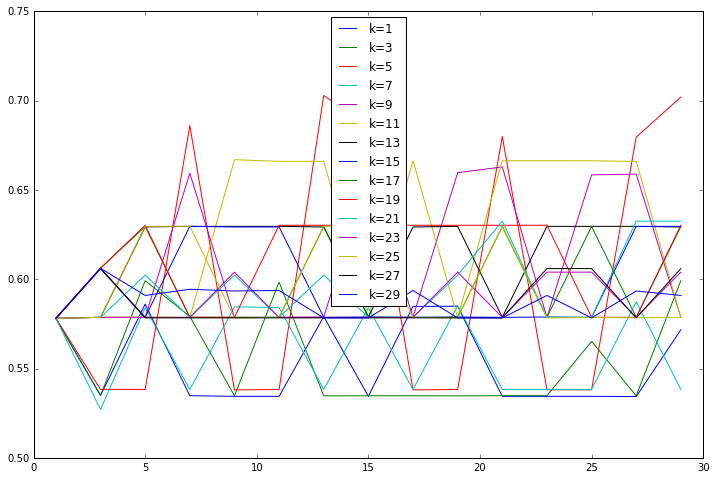

0.702900125151 5 13


In [74]:
%matplotlib inline
a_max=0
kmax,pmax=0,0

plt.title("AUC ROC with increasing K")
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC ROC')
plt.figure(figsize=(12, 8))
for k in range(1,30,2):
    x=[]
    y=[]
    for p in range(1,30,2):
        clf1 = DecisionTreeClassifier(min_samples_leaf=k,max_depth=p)
        clf1 = clf1.fit(newtrain2, y_train)
        pred=clf1.predict_proba(newtest)[:,1]
        a=roc_auc_score(y_test, pred)
        if a>a_max:
            a_max=a
            kmax=k
            pmax=p
        x.append(p)
        y.append(a)
    plt.plot(x,y,label="k="+str(k))

plt.legend(loc='best')
plt.show()
print(a_max,kmax,pmax)            
                    

Лучшее качество при  max_depth=5 и min_samples_leaf=13

#### 2. Настройте случайный лес, подобрав такое число деревьев `n_estimators`, при котором ошибка выходит на асимптоту. Какое качество на тестовой выборке он дает?

In [75]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\Tasnima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Tasnima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


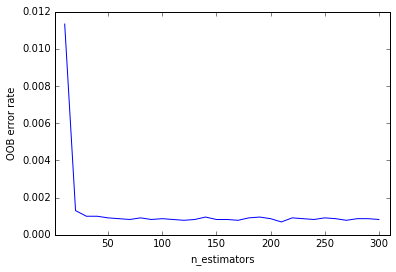

In [76]:
plt.xlim(1, 310)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
x=[]
y=[]
auc=[]
treeclf = RandomForestClassifier(oob_score=True)
for k in range(10,310,10):
    treeclf.set_params(n_estimators=k)
    treeclf = treeclf.fit(newtrain2, y_train)
    oob_error = 1 - treeclf.oob_score_
    x.append(k)
    y.append(oob_error)
    auc.append(roc_auc_score(y_test, treeclf.predict_proba(newtest)[:,1]))
plt.plot(x, y)
plt.show()

C:\Users\Tasnima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Tasnima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Tasnima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Tasnima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not

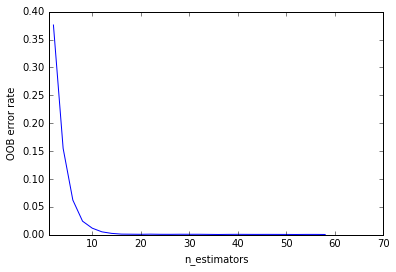

In [77]:
plt.xlim(1, 70)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
x2=[]
y2=[]
auc2=[]
treeclf = RandomForestClassifier(oob_score=True)
for k in range(2,60,2):
    treeclf.set_params(n_estimators=k)
    treeclf = treeclf.fit(newtrain2, y_train)
    oob_error = 1 - treeclf.oob_score_
    x2.append(k)
    y2.append(oob_error)
    auc2.append(roc_auc_score(y_test, treeclf.predict_proba(newtest)[:,1]))
plt.plot(x2, y2)
plt.show()

Ошибка выходит на асимптоту при n_estimators=15

#### 3. Возьмите выборку с парными признаками, для которой счетчики посчитаны с фолдингом. Обучите на ней случайный лес, подобрав число деревьев. Какое качество на тестовой выборке он дает? Чем вы можете объяснить изменение результата по сравнению с предыдущим пунктом?

In [86]:
ftreeclf = RandomForestClassifier()
ftreeclf = ftreeclf.fit(newtrain, y_train)
roc_auc_score(y_test, ftreeclf.predict_proba(newtest)[:,1])
x=[]
y=[]
treeclf = RandomForestClassifier()
for k in range(2,110,3):
    treeclf.set_params(n_estimators=k)
    x.append(k)
    treeclf = treeclf.fit(newtrain, y_train)
    a=roc_auc_score(y_test, treeclf.predict_proba(newtest)[:,1])
    y.append(a)

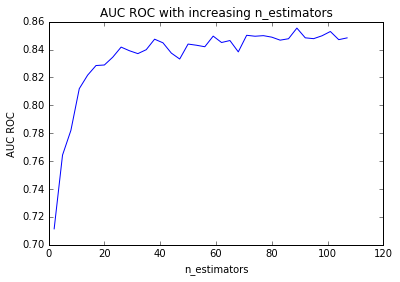

In [87]:
%matplotlib inline
plt.title("AUC ROC with increasing n_estimators")
plt.xlabel('n_estimators')
plt.ylabel('AUC ROC')
plt.plot(x, y)
plt.show()

Сильно улучшается качество для обучающих данных с фолдингом при n_estimators= 89

Здесь вы можете поделиться своими мыслями о задании.

А здесь вставьте смешную картинку.

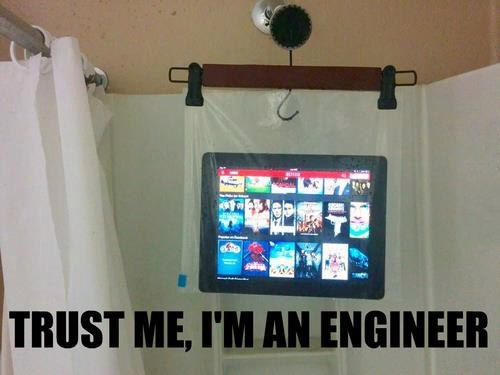

In [90]:
from IPython.display import Image
Image(filename='1.jpg')

А здесь посоветуйте преподавателям хороший фильм или сериал.

In [ ]:
Сериалы: Металист, Вечность, Флэш